[-0.2 -0.1]


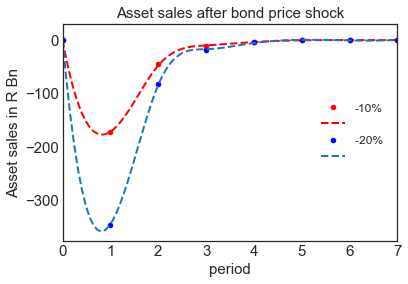

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update({'font.size': 15, 'font.family':'serif'})
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
sns.set_style("white")

df = pd.read_csv('test_2.csv')
# df1 = pd.read_csv('del_shock.csv')

#Drag out columns
# x_del = np.array(df1['del_effect'])
# x_total= np.array(df1['total_effect'])
# x_total_negative = -1 * x_total
# y_2= np.array(df['shock'])

df = pd.read_csv('test_2.csv')


df['system_TAS']= df['system_TAS']/10**9

keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
        

x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)

#For -10%
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
f1 = UnivariateSpline(x1, y1)
f2 = UnivariateSpline(x2, y2)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

#First figure
fig1 = plt.figure()


plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=2,  ms=4.5, color='r', label="-10%")
plt.plot(x2,y2,'bo',  x2new,f2(x2new),'--', lw=2,  ms=4.5, label="-20%")

# plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=1,  ms=3.5, color='r')
# plt.plot(x2,y2,'bo', x2new,f2(x2new),'--', lw=1,  ms=3.5)

plt.xlim(0, 7)
plt.xlabel("period", fontsize=15)
# plt.ylim(-4e11, 0.1e11)
plt.ylabel("Asset sales in R Bn", fontsize=15)
# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)

plt.title("Asset sales after bond price shock", fontsize=15)
plt.legend(['-10%', ' ', '-20% ', ' '], fontsize=12, loc=5)
plt.show()

fig1.savefig('sys_tas.eps', format='eps', dpi=1000)

plt.close()



[-0.2 -0.1]


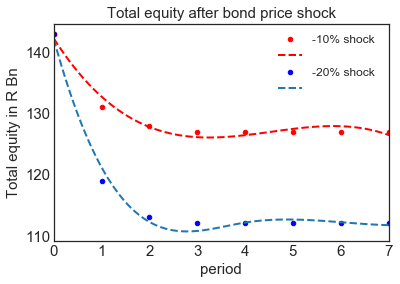

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update({'font.size': 15, 'font.family':'serif'})
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
sns.set_style("white")

df2 = pd.read_csv('test_2.csv')

df2['system_equity']= df2['system_equity']/10**9

keys = np.unique(df2['shock'])

print keys
for key in keys:
    if key == -0.1:
        I3 = np.argwhere(df2['shock']==key).squeeze()
    if key == -0.2:
        I4 = np.argwhere(df2['shock']==key).squeeze()
        
x3 = np.array(df2['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
x4 = np.array(df2['current_step'][I4])
x4new = np.linspace(0, len(x4), num=100)

#For -10%
y3 = df2['system_equity'][I3] 
y4 = df2['system_equity'][I4] 
f3 = UnivariateSpline(x3, y3)
f4 = UnivariateSpline(x4, y4)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

#First figure
fig2 = plt.figure()


plt.plot(x3,y3,'o',  x3new,f3(x3new),'--', lw=2,  ms=4.5, color='r', label="-10%")
plt.plot(x4,y4,'bo',  x4new,f4(x4new),'--', lw=2,  ms=4.5, label="-20%")

# plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=1,  ms=3.5, color='r')
# plt.plot(x2,y2,'bo', x2new,f2(x2new),'--', lw=1,  ms=3.5)

plt.xlim(0, 7)
plt.xlabel("period", fontsize=15)
# plt.ylim(-4e11, 0.1e11)
plt.ylabel("Total equity in R Bn", fontsize=15)
# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)

plt.title("Total equity after bond price shock", fontsize=15)
plt.legend(['-10% shock', ' ', '-20% shock ', ' '], fontsize=12, loc="best")
plt.show()

fig2.savefig('sys_equity.eps', format='eps', dpi=1000)

plt.close()



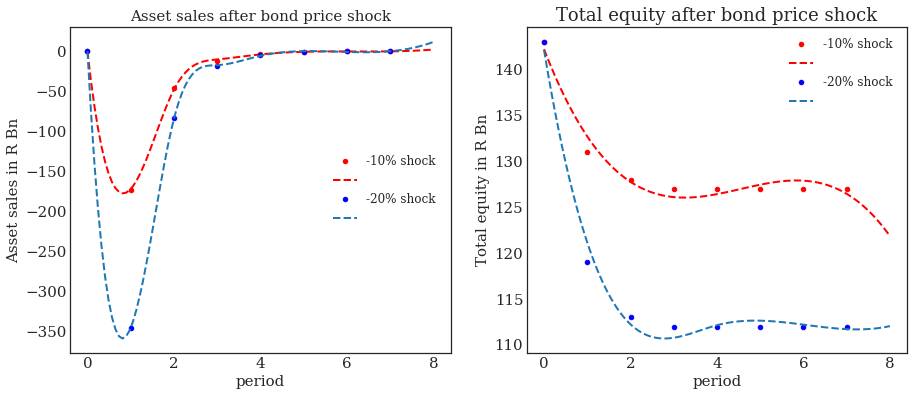

In [51]:
#Okay let's make a multi plot!!!!
# import matplotlib as mpl
# mpl.rcParams.update({'font.size': 15, 'font.family':'serif'})

fig_multi = plt.figure(figsize=(15,6))

ax1 = fig_multi.add_subplot(121)

ax1.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=2,  ms=4.5, color='r', label="-10%")
ax1.plot(x2,y2,'bo',  x2new,f2(x2new),'--', lw=2,  ms=4.5, label="-20%")
ax1.set_xlabel("period", fontsize=15)
ax1.set_ylabel("Asset sales in R Bn", fontsize=15)
ax1.set_title("Asset sales after bond price shock", fontsize=15)
ax1.legend(['-10% shock', ' ', '-20% shock ', ' '], fontsize=12, loc=5)

ax2 = fig_multi.add_subplot(122)
ax2.plot(x3,y3,'o',  x3new,f3(x3new),'--', lw=2,  ms=4.5, color='r', label="-10%")   
ax2.plot(x4,y4,'bo',  x4new,f4(x4new),'--', lw=2,  ms=4.5, label="-20%")

ax2.set_xlabel("period", fontsize=15)
# plt.ylim(-4e11, 0.1e11)
ax2.set_ylabel("Total equity in R Bn", fontsize=15)
# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)

ax2.set_title("Total equity after bond price shock")
ax2.legend(['-10% shock', ' ', '-20% shock ', ' '], fontsize=12, loc="best")

plt.show()


[-0.2 -0.1]


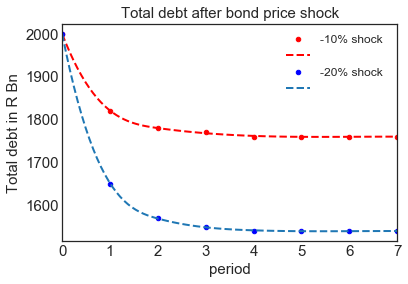

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update({'font.size': 15, 'font.family':'serif'})
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
sns.set_style("white")

df = pd.read_csv('test_2.csv')
# df1 = pd.read_csv('del_shock.csv')

#Drag out columns
# x_del = np.array(df1['del_effect'])
# x_total= np.array(df1['total_effect'])
# x_total_negative = -1 * x_total
# y_2= np.array(df['shock'])

df = pd.read_csv('test_2.csv')


df['system_debt']= df['system_debt']/10**9

keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
        

x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)

#For -10%
y1 = df['system_debt'][I1] 
y2 = df['system_debt'][I2] 
f1 = UnivariateSpline(x1, y1)
f2 = UnivariateSpline(x2, y2)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

#First figure
fig2 = plt.figure()


plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=2,  ms=4.5, color='r', label="-10%")
plt.plot(x2,y2,'bo',  x2new,f2(x2new),'--', lw=2,  ms=4.5, label="-20%")

# plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=1,  ms=3.5, color='r')
# plt.plot(x2,y2,'bo', x2new,f2(x2new),'--', lw=1,  ms=3.5)

plt.xlim(0, 7)
plt.xlabel("period", fontsize=15)
# plt.ylim(-4e11, 0.1e11)
plt.ylabel("Total debt in R Bn", fontsize=15)
# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)

plt.title("Total debt after bond price shock", fontsize=15)
plt.legend(['-10% shock', ' ', '-20% shock ', ' '], fontsize=12, loc="best")
plt.show()

fig2.savefig('sys_debt.eps', format='eps', dpi=1000)

plt.close()